# Birth-Death

This is for an integrated test of E-Cell4. Here, we test a simple birth-death process in volume.

In [1]:
%matplotlib inline
import numpy
from ecell4 import *
from ecell4.extra.ensemble import ensemble_simulations
from ecell4_base.core import GSLRandomNumberGenerator, Integer3

Parameters are given as follows. `D` and `radius` mean a diffusion constant and a radius of molecules, respectively. Dimensions of length and time are assumed to be micro-meter and second.

In [2]:
D = 1  # 0.01
radius = 0.005

In [3]:
N = 20  # a number of samples
rng = GSLRandomNumberGenerator()
rng.seed(0)

In [4]:
y0 = {} # {'A': 60}
duration = 3
T = numpy.linspace(0, duration, 21)
V = 8

Make a model for all algorithms. No birth reaction with more than one product is accepted.

In [5]:
with species_attributes():
    A | {'radius': radius, 'D': D}

with reaction_rules():
    ~A > A | 45.0
    A > ~A | 1.5

m = get_model()

Save a result with `ode` as `obs`, and plot it:

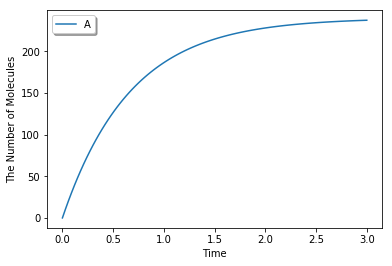

In [6]:
obs = run_simulation(numpy.linspace(0, duration, 101), y0, volume=V, model=m,
                     return_type='observer', solver='ode')
viz.plot_number_observer(obs)

Simulating with `gillespie` (Bars represent standard error of the mean):

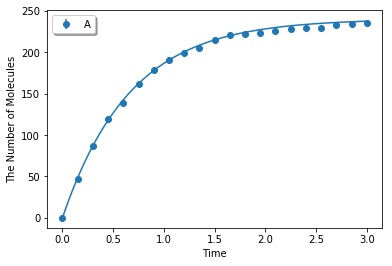

In [7]:
ensemble_simulations(T, y0, volume=V, model=m, opt_args=('o', obs, '-'),
                     solver='gillespie', n=N)

Simulating with `meso`:

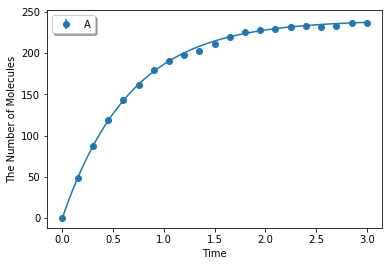

In [8]:
ensemble_simulations(T, y0, volume=V, model=m, opt_args=('o', obs, '-'),
                     solver=('meso', Integer3(1, 1, 1), 0.25), n=N)

Simulating with `spatiocyte`:

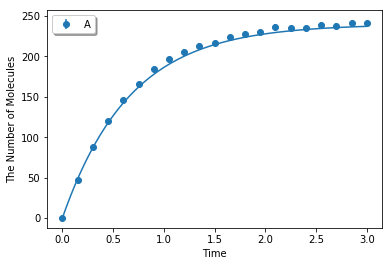

In [9]:
ensemble_simulations(T, y0, volume=V, model=m, opt_args=('o', obs, '-'),
                     solver=('spatiocyte', radius), n=N)

Simulating with `egfrd`:

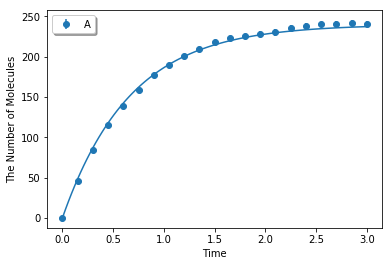

In [10]:
ensemble_simulations(T, y0, volume=V, model=m, opt_args=('o', obs, '-'),
                     solver=('egfrd', Integer3(8, 8, 8)), n=N)

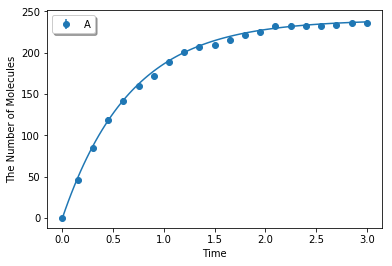

In [11]:
ensemble_simulations(T, y0, volume=V, model=m, opt_args=('o', obs, '-'),
                     solver=('bd', Integer3(8, 8, 8), 0.1), n=N)